# Conflictos bélicos y violencia

- [fuente](https://ucdp.uu.se/)
- [definiciones](https://www.pcr.uu.se/research/ucdp/definitions/)
- Programa de Datos de Conflictos de Uppsala 
- Departmento de investigación de la paz y el conflicto de la Universidad Uppsala de Suecia. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
import seaborn as sns
import geopy

In [3]:
# df = pd.read_csv("dataSetsEDA\\pop_in_poverty.csv", encoding = 'unicode_escape')

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

## Dataset conflictos

In [6]:
df = pd.read_csv("..\\DataSets\\Uppsala\\GEDEvent.csv",
                   dtype =object, usecols = ['year','date_start', 'date_end','type_of_violence','latitude','longitude',
                                             'geom_wkt','country',"side_a","side_b","deaths_a",'deaths_b',
                                             'deaths_civilians','deaths_unknown','best','high']
                  )

Explicación: Sundberg, Ralph, and Erik Melander, 2013, “Introducing the UCDP Georeferenced Event Dataset”, Journal of Peace Research, vol.50, no.4, 6

|type_of_violence| Type of UCDP conflict|
|----------------|----------------------|
||1: state-based conflict|
||2: non-state conflict|
||3: one-sided violence|

In [7]:
df.head()

,year,type_of_violence,side_a,side_b,latitude,longitude,geom_wkt,country,date_start,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best,high
0,2017,1,Government of Iraq,IS,34.531094,69.162796,POINT (69.162796 34.531094),Afghanistan,2017-07-31 00:00:00.000,2017-07-31 00:00:00.000,0,4,0,2,6,6
1,2021,1,Government of Iraq,IS,34.564444,69.217222,POINT (69.2172222 34.5644444),Afghanistan,2021-08-26 00:00:00.000,2021-08-26 00:00:00.000,13,1,141,28,183,184
2,2021,1,Government of Iraq,IS,34.428844,70.455750,POINT (70.45575 34.428844),Afghanistan,2021-08-28 00:00:00.000,2021-08-28 00:00:00.000,0,2,0,0,2,3
3,2021,1,Government of Iraq,IS,34.531094,69.162796,POINT (69.162796 34.531094),Afghanistan,2021-08-29 00:00:00.000,2021-08-29 00:00:00.000,0,0,10,0,10,10
4,1989,1,Government of Afghanistan,Jam'iyyat-i Islami-yi Afghanistan,34.333330,70.416670,POINT (70.41667 34.33333),Afghanistan,1989-01-07 00:00:00.000,1989-01-13 00:00:00.000,6,0,0,0,6,6


In [8]:
len(df[df.duplicated()])

4598

In [9]:
prct_duplicados = round((len(df[df.duplicated()])/len(df)) *100,2)
prct_duplicados 

1.57

In [10]:
# Eliminamos los registros duplicados 
df = df.drop_duplicates()

In [11]:
df

,year,type_of_violence,side_a,side_b,latitude,longitude,geom_wkt,country,date_start,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best,high
0,2017,1,Government of Iraq,IS,34.531094,69.162796,POINT (69.162796 34.531094),Afghanistan,2017-07-31 00:00:00.000,2017-07-31 00:00:00.000,0,4,0,2,6,6
1,2021,1,Government of Iraq,IS,34.564444,69.217222,POINT (69.2172222 34.5644444),Afghanistan,2021-08-26 00:00:00.000,2021-08-26 00:00:00.000,13,1,141,28,183,184
2,2021,1,Government of Iraq,IS,34.428844,70.455750,POINT (70.45575 34.428844),Afghanistan,2021-08-28 00:00:00.000,2021-08-28 00:00:00.000,0,2,0,0,2,3
3,2021,1,Government of Iraq,IS,34.531094,69.162796,POINT (69.162796 34.531094),Afghanistan,2021-08-29 00:00:00.000,2021-08-29 00:00:00.000,0,0,10,0,10,10
4,1989,1,Government of Afghanistan,Jam'iyyat-i Islami-yi Afghanistan,34.333330,70.416670,POINT (70.41667 34.33333),Afghanistan,1989-01-07 00:00:00.000,1989-01-13 00:00:00.000,6,0,0,0,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293629,1989,3,Renamo,Civilians,-20.500000,32.500000,POINT (32.5 -20.5),Zimbabwe (Rhodesia),1989-03-18 00:00:00.000,1989-03-24 00:00:00.000,0,0,9,0,9,9
293630,1989,3,Renamo,Civilians,-19.000000,32.500000,POINT (32.5 -19),Zimbabwe (Rhodesia),1989-07-09 00:00:00.000,1989-07-15 00:00:00.000,0,0,9,0,9,9
293631,1990,3,Renamo,Civilians,-18.000000,32.833333,POINT (32.833333 -18),Zimbabwe (Rhodesia),1990-06-07 00:00:00.000,1990-06-10 00:00:00.000,0,0,7,0,7,7
293632,1990,3,Renamo,Civilians,-19.000000,32.500000,POINT (32.5 -19),Zimbabwe (Rhodesia),1990-11-17 00:00:00.000,1990-11-23 00:00:00.000,0,0,1,0,1,1


#### Chequear valores nulos

In [12]:
df.isna().mean() * 100

year               0.00
type_of_violence   0.00
side_a             0.00
side_b             0.00
latitude           0.00
longitude          0.00
geom_wkt           0.00
country            0.00
date_start         0.00
date_end           0.00
deaths_a           0.00
deaths_b           0.00
deaths_civilians   0.00
deaths_unknown     0.00
best               0.00
high               0.00
dtype: float64

In [13]:
df.columns

Index(['year', 'type_of_violence', 'side_a', 'side_b', 'latitude', 'longitude',
       'geom_wkt', 'country', 'date_start', 'date_end', 'deaths_a', 'deaths_b',
       'deaths_civilians', 'deaths_unknown', 'best', 'high'],
      dtype='object')

In [14]:
df.country.value_counts()

Syria                 84198
Afghanistan           41345
India                 16514
Mexico                10371
Bosnia-Herzegovina     8309
                      ...  
Italy                     1
Benin                     1
Qatar                     1
Botswana                  1
Malta                     1
Name: country, Length: 123, dtype: int64

In [15]:
df.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia-Herzegovina', 'Botswana', 'Brazil', 'Burkina Faso',
       'Burundi', 'Cambodia (Kampuchea)', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'China', 'Colombia', 'Comoros',
       'Congo', 'Croatia', 'Djibouti', 'DR Congo (Zaire)', 'Ecuador',
       'Egypt', 'El Salvador', 'Eritrea', 'Ethiopia', 'France', 'Gambia',
       'Georgia', 'Germany', 'Ghana', 'Guatemala', 'Guinea',
       'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Israel', 'Italy', 'Ivory Coast',
       'Jamaica', 'Jordan', 'Kenya', 'Kingdom of eSwatini (Swaziland)',
       'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Lesotho', 'Liberia',
       'Libya', 'Macedonia, FYR', 'Madagascar (Malagasy)', 'Malaysia',
       'Mali', 'Malta', 'Mauritania', 'Mexic

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289036 entries, 0 to 293633
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   year              289036 non-null  object
 1   type_of_violence  289036 non-null  object
 2   side_a            289036 non-null  object
 3   side_b            289036 non-null  object
 4   latitude          289036 non-null  object
 5   longitude         289036 non-null  object
 6   geom_wkt          289036 non-null  object
 7   country           289036 non-null  object
 8   date_start        289036 non-null  object
 9   date_end          289036 non-null  object
 10  deaths_a          289036 non-null  object
 11  deaths_b          289036 non-null  object
 12  deaths_civilians  289036 non-null  object
 13  deaths_unknown    289036 non-null  object
 14  best              289036 non-null  object
 15  high              289036 non-null  object
dtypes: object(16)
memory usage: 37.5+ MB


#### Cambiar el tipo de dato

In [17]:
#dfcf = dfcf.copy()

In [18]:
df.year = df['year'].astype('int')
df.type_of_violence == df.type_of_violence.astype('int')
df.best = df['best'].astype('int')
df.high = df['high'].astype('int')

In [19]:
df.latitude = df.latitude.astype('float')
df.longitude = df.longitude.astype('float')

#### Filtrar por año

In [20]:
df = df[df.year >= 1990].copy()

#### volver a chequear nulos

In [21]:
df.isna().mean()*100

year               0.00
type_of_violence   0.00
side_a             0.00
side_b             0.00
latitude           0.00
longitude          0.00
geom_wkt           0.00
country            0.00
date_start         0.00
date_end           0.00
deaths_a           0.00
deaths_b           0.00
deaths_civilians   0.00
deaths_unknown     0.00
best               0.00
high               0.00
dtype: float64

In [22]:
df.best.sum()

2786008

In [23]:
df['high'].sum()

4311859

In [24]:
df.high.describe()

count   286,540.00
mean         15.05
std         340.55
min           0.00
25%           1.00
50%           2.00
75%           6.00
max      75,000.00
Name: high, dtype: float64

#### Vamos a eliminar los campos que no vamos a utilizar en nuestro análisis

In [25]:
df.columns

Index(['year', 'type_of_violence', 'side_a', 'side_b', 'latitude', 'longitude',
       'geom_wkt', 'country', 'date_start', 'date_end', 'deaths_a', 'deaths_b',
       'deaths_civilians', 'deaths_unknown', 'best', 'high'],
      dtype='object')

In [26]:
# No analizaremos los países o bandos envueltos en los conflictos, tampoco las fechas de inicio y de final
df.drop(columns = ['side_a', 'side_b','date_start', 'date_end', 'deaths_a', 'deaths_b',
       'deaths_civilians', 'deaths_unknown'], inplace = True)

In [27]:
dfc = df[['year', 'type_of_violence', 'latitude', 'longitude', 'best', 'high']]

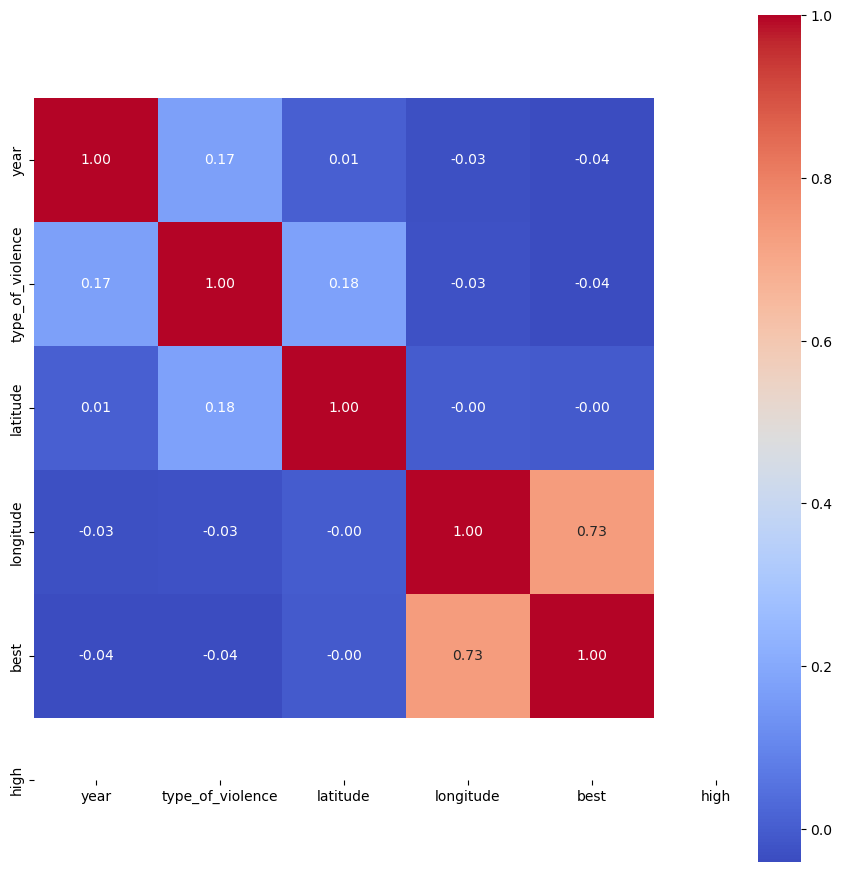

In [28]:
corr = dfc.corr(numeric_only = True)
plt.figure(figsize=(11,11))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 10},
           xticklabels= dfc.columns, 
           yticklabels= dfc.columns,
           cmap= 'coolwarm')
plt.show()

In [29]:
df['year'].unique()

array([2017, 2021, 1990, 1991, 1992, 1996, 1993, 1994, 1995, 2002, 2003,
       2006, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2016, 2004, 2005,
       2007, 2015, 2018, 2019, 2020, 1997, 1998, 1999, 2000, 2001])

Sacamos los años posteriores a 2020, que es el límite de nuestro análisis

In [30]:
df = df[df['year']<2021]

In [31]:
df['type_of_violence'] = df['type_of_violence'].astype(int)

In [32]:
df.groupby(['country', 'year'])['type_of_violence'].value_counts()

country              year  type_of_violence
Afghanistan          1990  1                   39
                           2                    6
                     1991  1                   60
                           2                    4
                     1992  1                   69
                                               ..
Zimbabwe (Rhodesia)  2011  3                    1
                     2012  3                    1
                     2018  3                    2
                     2019  3                    7
                     2020  3                    1
Name: type_of_violence, Length: 3179, dtype: int64

In [33]:
df.type_of_violence.value_counts()

1    200301
3     41120
2     29341
Name: type_of_violence, dtype: int64

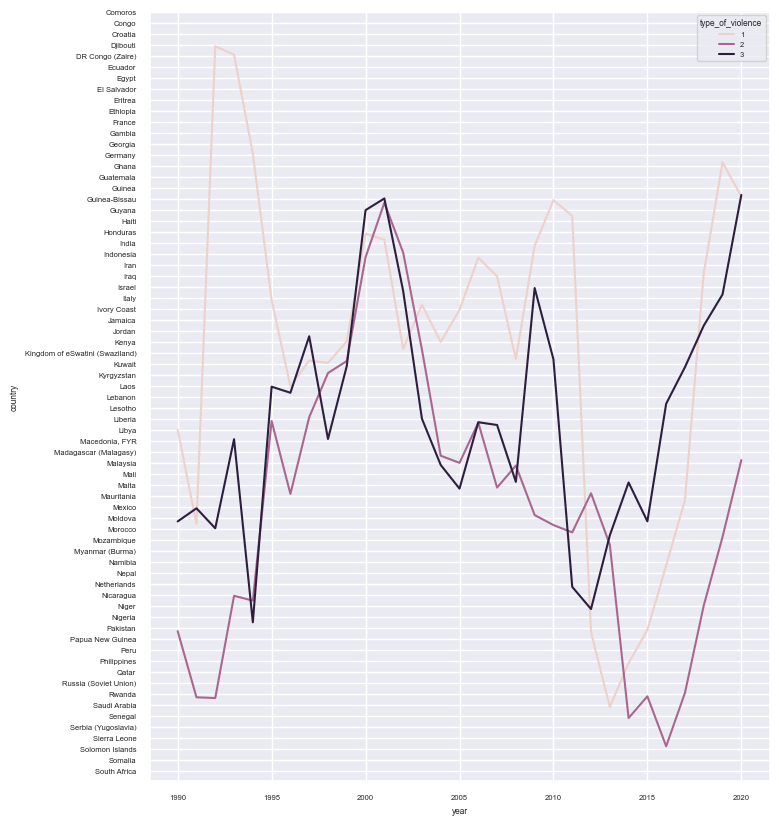

In [34]:
sns.set(rc = {'figure.figsize':(8,10)}, font_scale=0.5)
sns.lineplot(x = 'year',
            y = 'country',
            hue = 'type_of_violence',
            data = df,
            errorbar = None)
 
# Show the plot
plt.show()

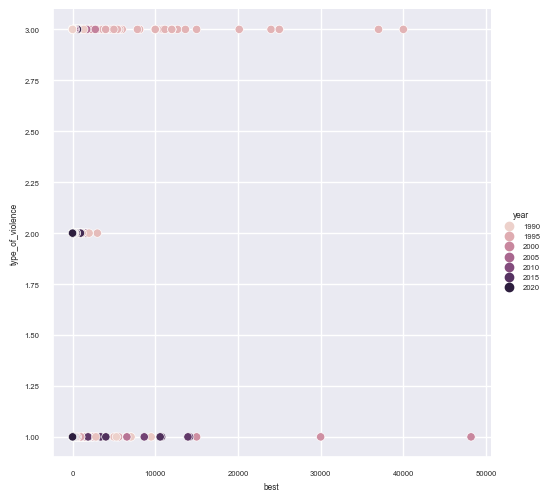

In [35]:
sns.relplot(data=df, x="best", y="type_of_violence", hue='year')
plt.show()

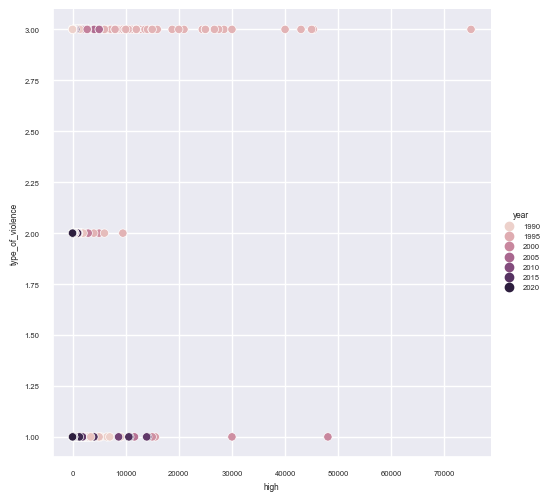

In [36]:
sns.relplot(data=df, x="high", y="type_of_violence", hue='year')
plt.show()

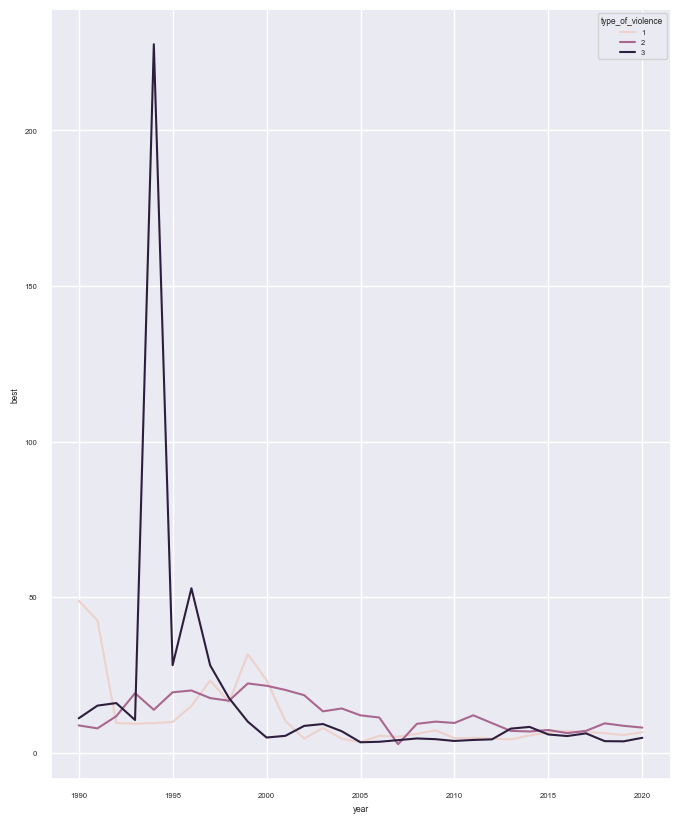

In [37]:

sns.lineplot(x = 'year',
            y = 'best',
            hue = 'type_of_violence',
            data = df,
            errorbar = None)
 
# Show the plot
plt.show()

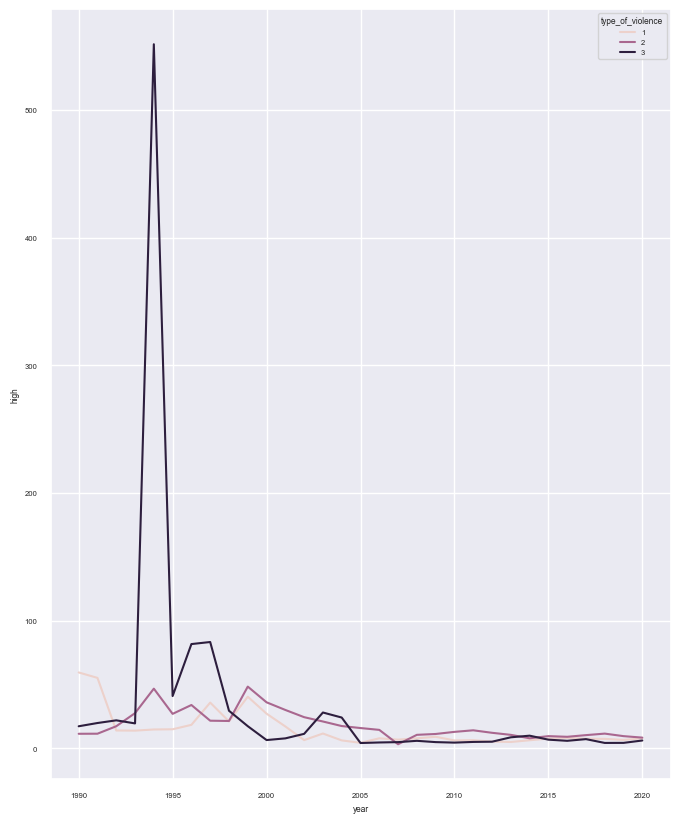

In [38]:
sns.lineplot(x = 'year',
            y = 'high',
            hue = 'type_of_violence',
            data = df,
            errorbar = None)
 
# Show the plot
plt.show()

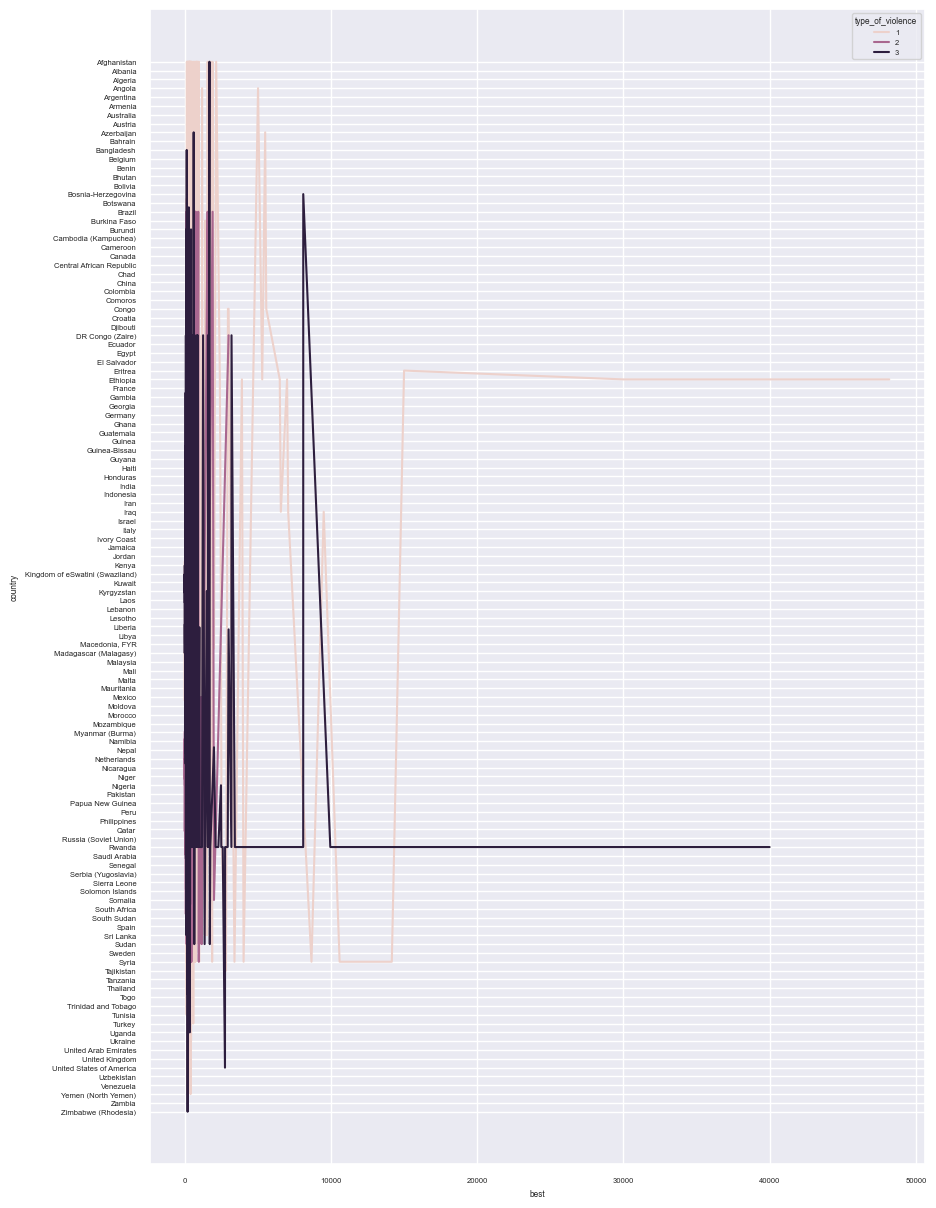

In [39]:
sns.set(rc = {'figure.figsize':(10,15)}, font_scale=0.5)
sns.lineplot(x = 'best',
            y = 'country',
            hue = 'type_of_violence',
            data = df,
            errorbar = None)
 
# Show the plot
plt.show()

## Vamos a normalizar los datos

### Cambiamos el tipo de dato de la columna year

In [40]:
df['year'] = pd.to_datetime(df['year'], format='%Y')

### Comencemos con los nombres de países, queremos dejar solo los nombres actuales y/o los asignados por los investigadores de nuestra fuente de datos.

In [41]:
# creamos un objeto SRE_Pattern con el siguiente patrón, espacio en blanco seguido de paréntesis con
# "cualquier dato" dentro de estos.
def remover_paréntesis(string):
    pattern = re.compile(r"\s*\(.*?\)")
    country = string
    country = pattern.sub("", country)
    
    return country

In [42]:
df2 = df.copy()

In [43]:
df.country = df.country.apply(lambda x: remover_paréntesis(x))

#### Vamos a llevar todos los nombres a letras mayúsculas para igualar el trabajo en todos los datasets

In [44]:
df.country = df.country.apply(lambda x: x.upper())

#### También debemos cambiar el nombre de la columna

In [45]:
df.rename(columns = {'country' : 'country_name'}, inplace = True)

### Ahora, usemos nuestro estandar para igualar los nombres de países

In [48]:
est = pd.read_csv('..\\DataSets\\estandar_paises_regiones.csv', usecols =['country_name'])

In [49]:
# guardamos los valores únicos de los nombres de países de cada data frame
paisesdf = set(df['country_name'])
paises_est = set(est['country_name'])

In [50]:
# Identificamos el dataframe con menos países (debería ser el data frame principal de este notebook)
if len(paisesdf) <= len(paises_est):
    df_menos_paises = df
    df_mas_paises = est
else:
    df_menos_paises = est
    df_menos_paises = df

In [51]:
# Obtenemos los nombres únicos de países en el dataframe con menos nombres
paises_menos = set(df_menos_paises['country_name'])

In [52]:
# Obtenemos los nombres únicos de países en el dataframe con más nombres
paises_mas = set(df_mas_paises['country_name'])

In [53]:
# Obtener nombres únicos de países que están en el dataframe con menos nombres y no en el dataframe con más nombres
paises_no_comunes = paises_menos.difference(paises_mas)

#### Los siguientes nombres tienen que ser reemplazados en el dataframe df 

In [54]:
paises_no_comunes

{'BOSNIA-HERZEGOVINA',
 'DR CONGO',
 'IVORY COAST',
 'KINGDOM OF ESWATINI',
 'MACEDONIA, FYR',
 'SYRIA',
 'TURKEY',
 'UNITED STATES OF AMERICA'}

In [55]:
reemplazos = {'BOSNIA-HERZEGOVINA': 'BOSNIA AND HERZEGOVINA',
              'DR CONGO': 'DEMOCRATIC REPUBLIC OF THE CONGO', 
              'IVORY COAST' :'CÔTE D’IVOIRE',
              'KINGDOM OF ESWATINI':'ESWATINI',
              'MACEDONIA, FYR': 'NORTH MACEDONIA',
              'SYRIA': 'SYRIAN ARAB REPUBLIC',
              'TURKEY':'TÜRKIYE',
             'UNITED STATES OF AMERICA': 'UNITED STATES'}

In [56]:
df.country_name = df.country_name.replace(reemplazos)

#### Chequeamos que los nombres hayan sido sustituídos, no debería haber diferencias entre ambos sets, por lo tanto deberíamosobtener un set vacío

In [57]:
paises_menos = set(df_menos_paises['country_name'])
paises_mas = set(df_mas_paises['country_name'])
paises_no_comunes = paises_menos.difference(paises_mas)
paises_no_comunes

set()

In [59]:
df.to_csv('..\\DataSets\\Uppsala\\conflictos_final.csv', index = False)